<a href="https://colab.research.google.com/github/2403A51L33/PfDS-PROJECT/blob/main/PYTHON%20CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Model Accuracy: 93.75%
ROC-AUC Score: 0.549

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       280
           1       0.00      0.00      0.00         8

    accuracy                           0.94       288
   macro avg       0.49      0.48      0.48       288
weighted avg       0.94      0.94      0.94       288



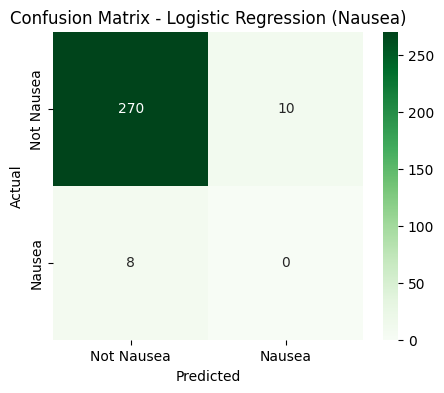

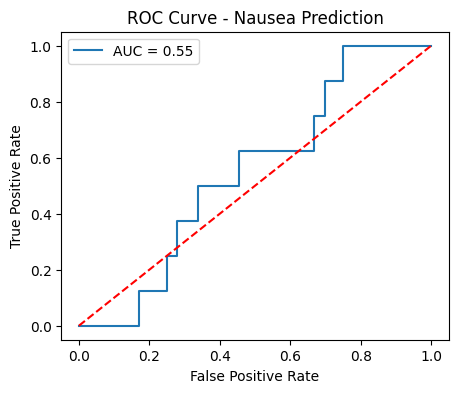

In [5]:
# binary_classification_nausea.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = "realistic_drug_labels_side_effects.csv"
df = pd.read_csv(file_path)

# Step 2: Select target and text columns
target_col = 'side_effects' if 'side_effects' in df.columns else df.columns[-1]
df = df.dropna(subset=[target_col]).reset_index(drop=True)

# Combine all text columns into one
text_cols = df.select_dtypes(include=['object']).columns.tolist()
text_cols = [c for c in text_cols if c != target_col]
df['__text__'] = df[text_cols].fillna('').agg(' '.join, axis=1)

# Step 3: Binary target creation
df['target'] = df[target_col].apply(lambda x: 1 if str(x).strip().lower() == 'nausea' else 0)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(df['__text__'], df['target'],
                                                    test_size=0.2, random_state=42, stratify=df['target'])

# Step 5: TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_t = tfidf.fit_transform(X_train)
X_test_t = tfidf.transform(X_test)

# Step 6: Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_t, y_train)

# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bal, y_train_bal)

# Step 8: Predictions
y_pred = model.predict(X_test_t)
y_prob = model.predict_proba(X_test_t)[:, 1]

# Step 9: Evaluation
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print(f"✅ Model Accuracy: {acc*100:.2f}%")
print(f"ROC-AUC Score: {roc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Nausea", "Nausea"], yticklabels=["Not Nausea", "Nausea"])
plt.title("Confusion Matrix - Logistic Regression (Nausea)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.title("ROC Curve - Nausea Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
